In [1]:
from __future__ import annotations
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from Methods import EstimationMethods
from Gen_data import SimulationStudy
import matplotlib.pyplot as plt


In [2]:
def get_split(simulation: pd.DataFrame) -> tuple[pd.DataFrame]:
    
    train_df, test_df = train_test_split(simulation, test_size=0.5, random_state=42)

    # Extract features and target variables for training
    X_train = train_df[[col for col in simulation.columns if col.startswith('X')]]
    T_train = train_df['T']
    Y_train = train_df['y']

    # Extract features and true CATE for testing
    X_test = test_df[[col for col in simulation.columns if col.startswith('X')]]
    T_test = test_df['T']
    y_test = test_df['y']

    true_cate_test = test_df[['CATE', 'T']]

    return train_df, test_df, X_train, Y_train, T_train, X_test, T_test, y_test, true_cate_test

In [3]:
def vis_treatment_eff(simulation: pd.DataFrame):
    sorted_cate = simulation[simulation['T'] == 1]
    sorted_cate = sorted_cate.sort_values(by=['CATE'])
    sorted_cate = sorted_cate[['CATE']]

    x = np.linspace(0, len(sorted_cate), num=len(sorted_cate))
    plt.scatter(x, sorted_cate, alpha=0.5)
    #plt.plot(x, sorted_cate, color='red')
    plt.xlabel('Observations')
    plt.ylabel('Treatment Effects')

In [4]:
def plot_predict_cate_corr(est_cate: np.array|pd.DataFrame, true_cate_test: np.array|pd.DataFrame):
    
    plt.figure(figsize=(8, 8))
    plt.scatter(est_cate, true_cate_test, alpha=0.5)    
    plt.plot([min(true_cate_test), max(true_cate_test)], [min(true_cate_test), max(true_cate_test)], '--', color='red')
    plt.xlabel('Estimated CATE')
    plt.ylabel('True CATE')
    plt.grid(True)
    plt.show()

    if type(est_cate) == pd.DataFrame:
        reg = LinearRegression().fit(est_cate, true_cate_test)
    else:
        est_cate = est_cate.reshape(-1,1)
        reg = LinearRegression().fit(est_cate, true_cate_test)

    print(f'Correlation between true and predicted CATE: {reg.score(est_cate, true_cate_test)}')

In [5]:
mse_dict = {}

for n in range(500, 10001, 50):
    
    sim: SimulationStudy = SimulationStudy(p=50, mean_correlation=0.1, cor_variance=0.1, n=n, geom=True)
    simulation = sim.create_dataset()
    train_df, test_df, X_train, Y_train, T_train, X_test, T_test, Y_test, true_cate_test = get_split(simulation)
    
    estimators: EstimationMethods = EstimationMethods(X_train, T_train, Y_train, X_test, T_test, Y_test, true_cate_test)
    estimated_cate_ols, ols_MSE = estimators.ols_estimator()
    
    key = f'{n}'
    mse_dict[key] = ols_MSE

mse_df = pd.DataFrame()
mse_df['n'] = mse_dict.keys()
mse_df['MSE'] = mse_dict.values()


covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric positive-semidefinite.
covariance is not symmetric pos

Text(0, 0.5, 'MSE')

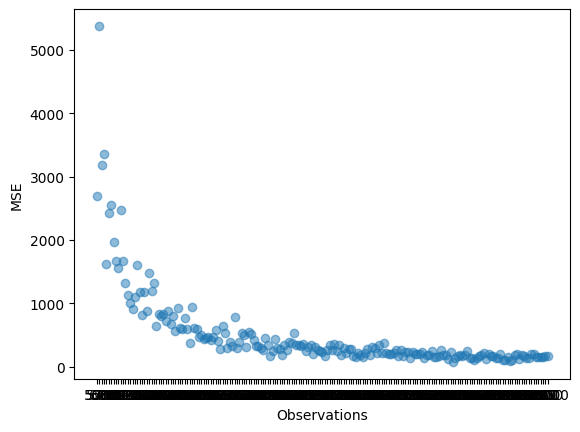

In [8]:
plt.scatter(mse_df['n'], mse_df['MSE'], alpha=0.5)
plt.xlabel('Observations')
plt.ylabel('MSE')

In [ ]:
estimate_cate_ols, ols_MSE = estimators.ols_estimator()
estimated_cate_t, t_MSE = estimators.TLearner_estimator()
estimated_cate_dml, cf_dml_MSE = estimators.CF_DML()
estimated_cate_non_param, non_param_MSE = estimators.non_param_dml()